### Описание проекта

#### Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

#### Задачи проекта

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

#### Описание данных

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales`— продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Открытие файлов и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
from scipy import stats as stt

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


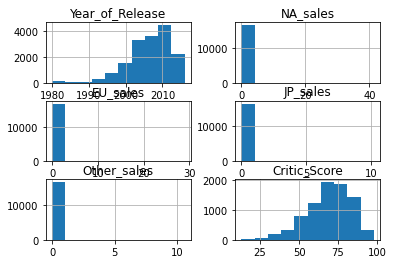

In [3]:
data.hist();


✔️ Промежуточный вывод
    
Файл с данными открыт и отображается корректно. Названия столбцов необходимо привести к единому стилю, наблюдаются пропуски и несоответствие типов данных, в значениях продаж присутствуют аномальные

### Подготовка данных

#### Замена названий столбцов

In [4]:
columns = []
for column in data:
    columns.append(column.lower())
data.columns = columns
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Лада:** ✔️ Названия столбцов приведены к единому стилю

#### Преобразование данных

##### Преобразование типов данных

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


   
**Лада:** ✔️ столбцы `year_of_release` и `user_score` необходимо привести к числовому типу данных

In [6]:
def check_type(column, table):
    types = {}
    for value in table[column].unique():
        if type(value) not in types:
            types[type(value)] = []
        types[type(value)].append(value)
    print(types)

##### Столбец `year_of_release`

In [7]:
check_type('year_of_release', data)

{<class 'numpy.float64'>: [2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989.0, 1984.0, 2005.0, 1999.0, 2007.0, 2010.0, 2013.0, 2004.0, 1990.0, 1988.0, 2002.0, 2001.0, 2011.0, 1998.0, 2015.0, 2012.0, 2014.0, 1992.0, 1997.0, 1993.0, 1994.0, 1982.0, 2016.0, 2003.0, 1986.0, 2000.0, nan, 1995.0, 1991.0, 1981.0, 1987.0, 1980.0, 1983.0]}


    
**Лада:** ✔️ Столбец состоит из значений типа float и nan. Приведу его к типу int

In [8]:
data['year_of_release'] = data['year_of_release'].fillna(np.nan).astype('Int32')
check_type('year_of_release', data)

{<class 'numpy.int32'>: [2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991, 1981, 1987, 1980, 1983], <class 'pandas._libs.missing.NAType'>: [<NA>]}


  
**Лада:** ✔️ столбец `year_of_release` приведён к числовому типу данных

###### Столбец `user_score`

In [9]:
check_type('user_score', data)

{<class 'str'>: ['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8', '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], <class 'float'>: [nan]}


  
**Лада:** ✔️ Столбец состоит из строк, представляющих собой числа с плавающей точкой, и значений 'tbd'
    
TBD — это аббревиатура, которая обозначает «To Be Determined» (англ. «будет определено»). Это выражение используется в различных областях и означает, что некоторые детали еще не известны или не определены, следовательно, строки с этим значением корректны, однако их не представляется возможным учитывать при оценке влияния рейтингов, поэтому их необходимо заменить медианным по платформе, а числа с плавающей точкой необходимо привести к соответствующему формату данных

In [10]:
data.loc[data['user_score'] != 'tbd', 'user_score'] = data.loc[data['user_score'] != 'tbd', 'user_score'].astype('string').astype('float').fillna(np.nan)
check_type('user_score', data)

{<class 'float'>: [8.0, nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9.0, 7.9, 8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2, 9.2, 7.0, 7.3, 4.3, 7.6, 5.7, 5.0, 9.1, 6.5, 8.8, 6.9, 9.4, 6.8, 6.1, 6.7, 5.4, 4.0, 4.9, 4.5, 9.3, 6.2, 4.2, 6.0, 3.7, 4.1, 5.8, 5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5, 2.5, 1.9, 3.0, 2.7, 2.2, 2.0, 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0.0, 1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6, 1.4, 0.9, 1.0, 9.7], <class 'str'>: ['tbd']}


  
**Лада:** ✔️ Числа с плавающей точкой приведены к соответствующему формату данных

#### Столбец `rating`

In [11]:
data.loc[data['rating'].isna(), 'rating'] = 'unknown'
data['rating'].isna().sum()

0

   
**Лада (2):** ✔️ Пропущенные значения столбца `rating` заменены значением unknown

#### Обработка пропусков

In [12]:
def missed(column):
    print(f'Процент попущенных значений в столбце {column} равен {round(data[column].isna().sum()/len(data.index), 4)}')

In [13]:
for column in data:
    missed(column)

Процент попущенных значений в столбце name равен 0.0001
Процент попущенных значений в столбце platform равен 0.0
Процент попущенных значений в столбце year_of_release равен 0.0161
Процент попущенных значений в столбце genre равен 0.0001
Процент попущенных значений в столбце na_sales равен 0.0
Процент попущенных значений в столбце eu_sales равен 0.0
Процент попущенных значений в столбце jp_sales равен 0.0
Процент попущенных значений в столбце other_sales равен 0.0
Процент попущенных значений в столбце critic_score равен 0.5132
Процент попущенных значений в столбце user_score равен 0.4009
Процент попущенных значений в столбце rating равен 0.0


    
**Лада:** ✔️ Пропусков в столбцах `platform`, `na_sales`, `eu_sales`, `jp_sales`, `other_sales` нет. Количество пропусков в столбцах `name`, `year_of_release`, `genre` незначительно. На пропуски в столбцах `raiting`, `critic_score` и `user_score` следует обратить особое внимание


**Лада:** ✔️ Проверю, как пропуски распределены по платформам

In [14]:
def missed_array(column1, column2):
    total_missed1 = []
    total_missed2 = []
    for curr_platform in data['platform'].unique():
        table1 = data.query('platform == @curr_platform')
        missed1 = table1[column1].isna().sum()/len(table1.index)
        table2 = data.query('platform == @curr_platform')
        missed2 = table2[column2].isna().sum()/len(table2.index)
        if missed1 == 1.0:
            total_missed1.append(curr_platform)
        elif missed1 != 1.0 or missed2 != 1.0:
            print(f'Данные по платформе {curr_platform}:')
            print(f'пропущено {round(missed1*100, 2)}% столбца {column1} и {round(missed2*100, 2)}% столбца {column2}')
            print()
        if missed2 == 1.0:
            total_missed2.append(curr_platform)
    print(f'Столбец {column1} полностью пропущен в платформах {total_missed1}')
    print(f'Столбец {column2} полностью пропущен в платформах {total_missed2}')   

In [15]:
missed_array('user_score', 'critic_score')

Данные по платформе Wii:
пропущено 24.24% столбца user_score и 55.68% столбца critic_score

Данные по платформе DS:
пропущено 40.86% столбца user_score и 66.67% столбца critic_score

Данные по платформе X360:
пропущено 16.8% столбца user_score и 27.42% столбца critic_score

Данные по платформе PS3:
пропущено 27.57% столбца user_score и 38.39% столбца critic_score

Данные по платформе PS2:
пропущено 31.47% столбца user_score и 39.94% столбца critic_score

Данные по платформе GBA:
пропущено 37.1% столбца user_score и 46.72% столбца critic_score

Данные по платформе PS4:
пропущено 32.91% столбца user_score и 35.71% столбца critic_score

Данные по платформе 3DS:
пропущено 55.77% столбца user_score и 67.69% столбца critic_score

Данные по платформе PS:
пропущено 82.71% столбца user_score и 83.29% столбца critic_score

Данные по платформе XB:
пропущено 10.68% столбца user_score и 12.01% столбца critic_score

Данные по платформе PC:
пропущено 15.91% столбца user_score и 26.59% столбца critic_

 
**Лада:** ✔️ Пропуски в столбцах `user_score` и `critic_score` распрделены неравномерно, значений столбца `user_score` обычно больше, чем столбца `critic_score`.


**Лада (2):** ✔️ Значения tbd и пропущенные значения столбцов user_score и critic_score заменю на nan

In [16]:
data.loc[data['user_score'] == "tbd", 'user_score'] = np.nan
data.loc[data['user_score'] == "tbd", 'user_score'].count()
data['user_score'] = data['user_score'].astype('float')


**Лада (2):** ✔️ Данные заменены

#### Обработка дубликатов

In [17]:
data.duplicated().sum()

0

   
**Лада (2):** ✔️ Явных дубликатов в таблице нет

In [18]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E



**Лада:** ✔️ В данных есть дубликаты: значения с id 659	и 14244	можно удалить, так в них много пропусков, а продажи игры с id 604 и 16230 сложить

 
**Лада:** ✔️ *Промежуточный вывод*

Названия столбцов приведены к единому стилю, типы данных приведены к необходимым, выбивающиеся значения обработаны

### Исследовательский анализ данных

#### Статистика количества выпускаемых игр в разные годы

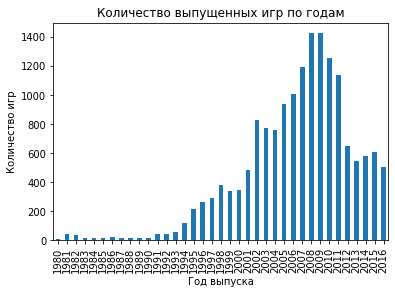

In [19]:
years_stat = data.groupby('year_of_release')['name'].count()
years_stat.plot(kind='bar', title='Количество выпущенных игр по годам', ylabel='Количество игр', xlabel='Год выпуска');

  
**Лада:** ✔️ По графику видно, что до 1995 года производилось незначительное количество игр, поэтому данные за период, предшествующий этому можно считать неважными. 
    
До 2008 года наблюдается постоянный уверенный рост игровой индустрии с пиком продаж в 2008-2009 годах, после наблюдается значительный спад с сохранением относительной стабильности с 2011 по 2016 год

#### Изменение продаж по платформам

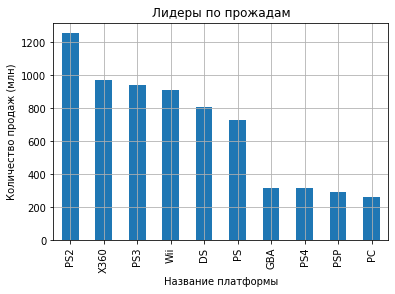

In [20]:
data['total_sales'] = data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales']
top_10 = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top_10.plot(kind='bar', x='name', y='total_sales', xlabel='Название платформы',
            ylabel='Количество продаж (млн)', title='Лидеры по прожадам', grid=True);

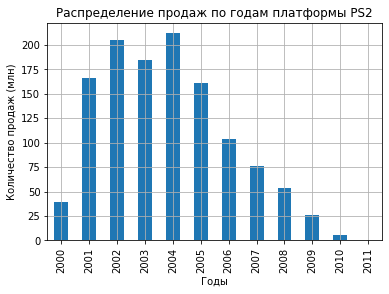

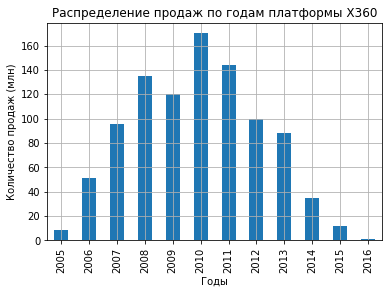

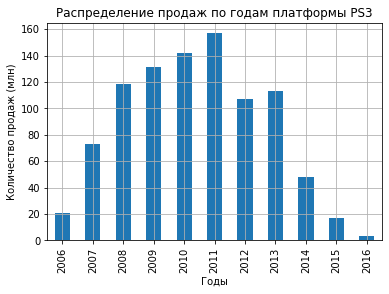

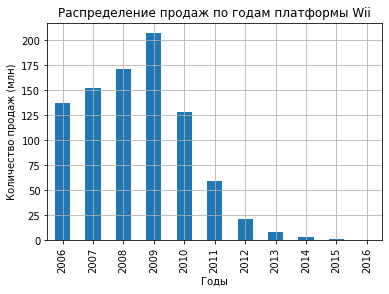

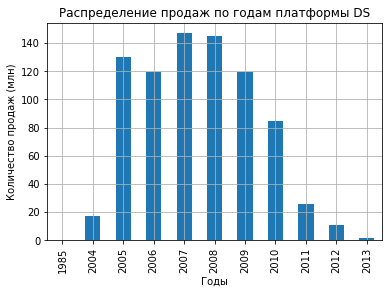

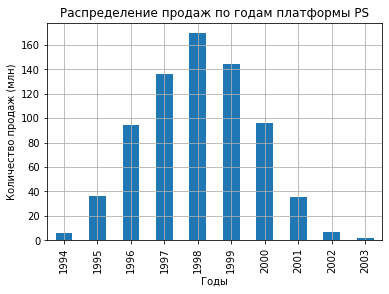

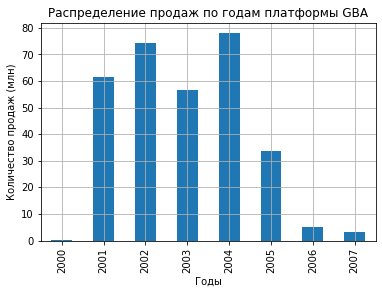

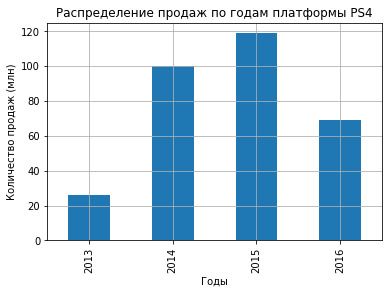

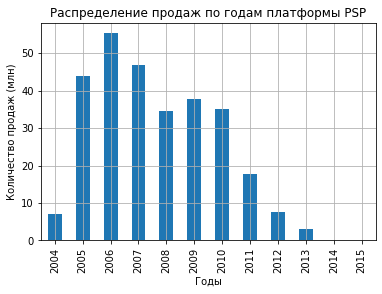

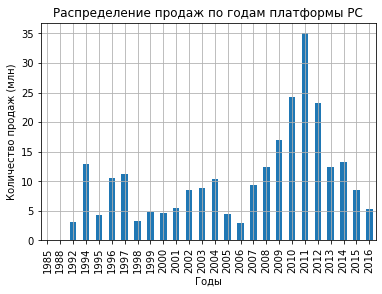

In [21]:
top_10_platforms = top_10.index
total_years = []
for cur_platform in top_10_platforms:
    table = data.query('platform == @cur_platform').groupby('year_of_release')['total_sales'].sum()
    years = table.index
    table.plot(kind='bar', x='year_of_release', y='total_sales', xlabel='Годы',
            ylabel='Количество продаж (млн)', title=f'Распределение продаж по годам платформы {cur_platform}', grid=True);
    plt.show()
    total_years.append(years[len(years)-1] - years[0])

In [22]:
print(f'Медианное время существования большой платформы {st.median(total_years)} лет')

Медианное время существования большой платформы 10.5 лет


 
**Лада:** ✔️ К 2016 году из 10 платформ, лидирующих по общему объёму продаж, (`PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`, `GBA`, `PS4`, `PSP`, `PC`) продолжили продажи только 5 (`X360`, `PS3`, `Wii`, `PS4`, `PC`). При этом в основном платформы находились на рынке около одиннадцати лет. Динамика продаж платформ-гигантов соосветствует общей динамике продаж в отрасли

#### Определение актуального периода наблюдений


**Лада (2):** ✔️ За актуальные приму данные с 2013 года

In [23]:
good_data = data.query('2012 < year_of_release')
good_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


 
**Лада:** ✔️ Таблица с актуальными данными построена

#### Определение динамики развития

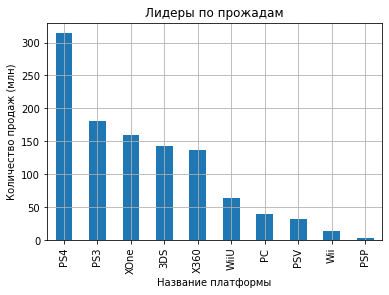

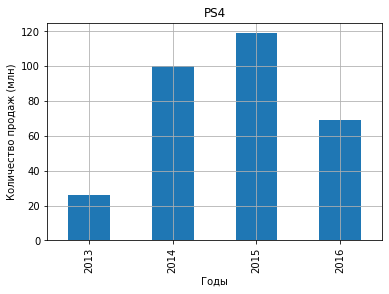

Медианная разница продаж в год платформы PS4 равна 18.9


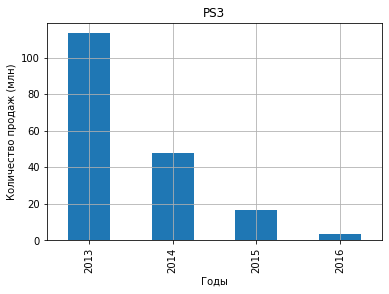

Медианная разница продаж в год платформы PS3 равна -30.94


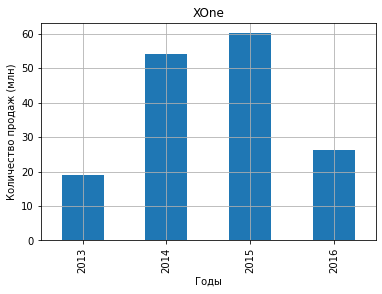

Медианная разница продаж в год платформы XOne равна 6.07


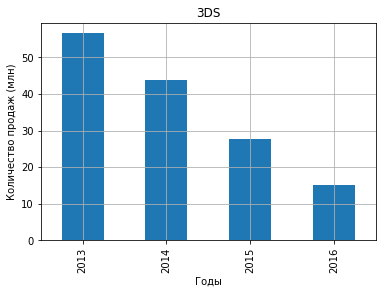

Медианная разница продаж в год платформы 3DS равна -12.81


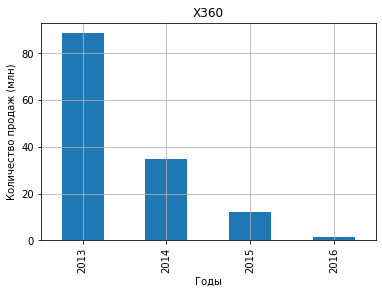

Медианная разница продаж в год платформы X360 равна -22.78


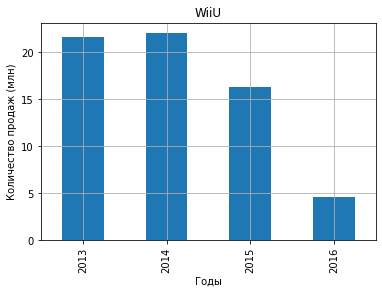

Медианная разница продаж в год платформы WiiU равна -5.68


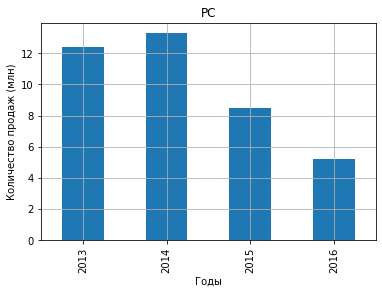

Медианная разница продаж в год платформы PC равна -3.27


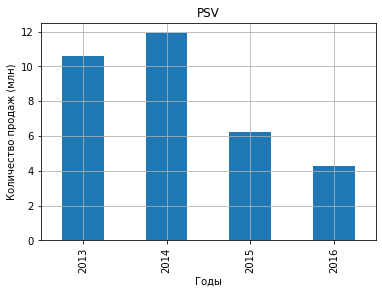

Медианная разница продаж в год платформы PSV равна -2.0


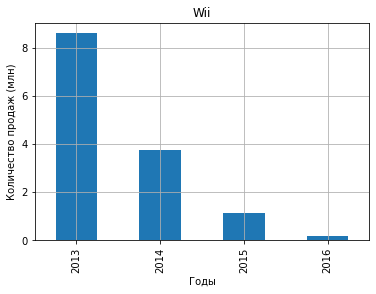

Медианная разница продаж в год платформы Wii равна -2.61


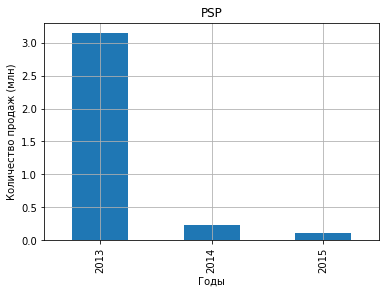

Медианная разница продаж в год платформы PSP равна -1.51


In [24]:
top_10 = good_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top_10.plot(kind='bar', x='name', y='total_sales', xlabel='Название платформы',
            ylabel='Количество продаж (млн)', title='Лидеры по прожадам', grid=True);
plt.show()
total_years = []
top_10_platforms = top_10.index
profit = []
for cur_platform in top_10_platforms:
    table = good_data.query('platform == @cur_platform').groupby('year_of_release')['total_sales'].sum()
    table.plot(kind='bar', x='year_of_release', y='total_sales', xlabel='Годы',
            ylabel='Количество продаж (млн)', title=cur_platform, grid=True);
    plt.show()
    years = table.index
    diff = []
    for i in range(len(years)-1):
        diff.append(table[years[i+1]] - table[years[i]])
    print(f'Медианная разница продаж в год платформы {cur_platform} равна {round(st.median(diff), 2)}')


**Лада (2):** ✔️ 
Положительную динамику развития показали платформы:
    
- *PS4* (18.9 млн в год)

- *XOne* (6.07 млн в год)
    
Отрицательную динамику развития показали платформы:
    
- *PS3* (-30.94 млн в год)

- *3DS* (-12.81 млн в год)

- *X360* (-22.78 млн в год)

- *WiiU* (-5.68 млн в год)

- *PC* (-3.27 млн в год)

- *PSV* (-2 млн в год)

- *Wii* (-2.61 млн в год)

- *PSP* (-1.51 млн в год)
    
*Наиболее отстающими являются платформы PS3, X360 и 3DS*
    
**Потенциально прибыльными являются платформы PS4 и XOne**

#### Диаграмма разброса продаж

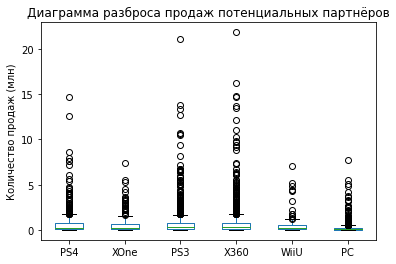

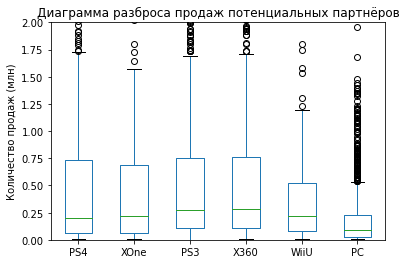

In [25]:
platforms = ['DC', 'DS', 'GBA', 'GC', 'PS2', 'XB']
PS4 = data.query('platform == "PS4"')['total_sales']
XOne = data.query('platform == "XOne"')['total_sales']
PS3 = data.query('platform == "PS3"')['total_sales']
X360 = data.query('platform == "X360"')['total_sales']
WiiU = data.query('platform == "WiiU"')['total_sales']
PC = data.query('platform == "PSP"')['total_sales']
df = pd.DataFrame({'PS4':PS4, 'XOne':XOne, 'PS3':PS3, 'X360':X360, 'WiiU':WiiU, 'PC':PC})
df.plot(kind='box', title='Диаграмма разброса продаж потенциальных партнёров').set_ylabel('Количество продаж (млн)');
df.plot(kind='box', title='Диаграмма разброса продаж потенциальных партнёров', ylim=(0, 2)).set_ylabel('Количество продаж (млн)');


**Лада (3):** ✔️ Распределение продаж потенциально платформ идентично: нормальные значения находятся в диапазоне 1.75 млн продаж, чаще всего - в районе 0.25 млн, присутствуют выбросы на графиках обеих платформ. Присутствуют выбросы, показывающие наиболее прибыльные игры платформ

In [26]:
new_data = good_data.copy() # Копия датафрейма с актуальным переодом

new_data = new_data.query('platform not in ["PS3", "X360", "Wii", "PSP"]') # Убираем наименее перспективные платформы

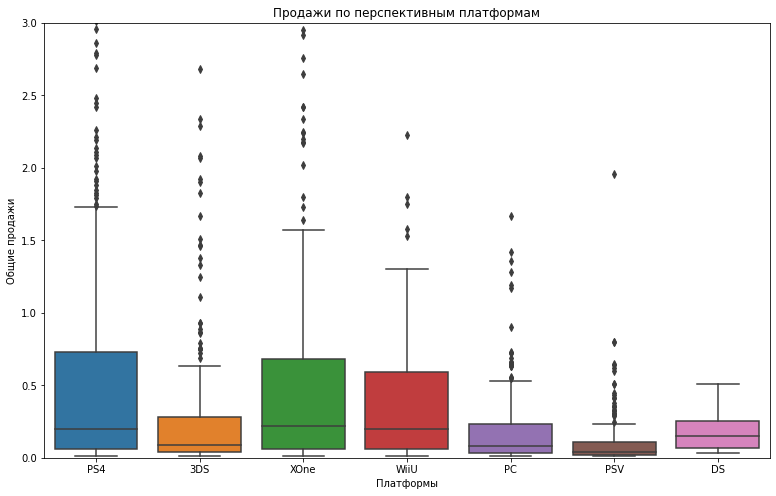

In [27]:
#Код ревьюера

import seaborn as sns

plt.figure(figsize=(13, 8))
(sns.boxplot(data = new_data, y = 'total_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

#### Влияние оценок критиков и пользователей на количество продаж платформы PS4

Корреляция между столбцами user_corr и total_sales равна -0.03195711020455639


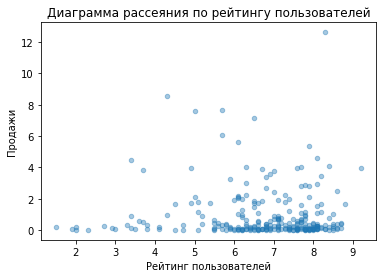

In [28]:
data_ps4 = good_data.query('platform == "PS4"').fillna(np.nan)
data_ps4.head()
user_corr = data_ps4['user_score'].corr(data_ps4['total_sales'])
print(f'Корреляция между столбцами user_corr и total_sales равна {user_corr}')
user_plot = data_ps4.plot(x='user_score', y='total_sales', kind='scatter',
                          alpha=0.4, title='Диаграмма рассеяния по рейтингу пользователей', 
                          xlabel='Рейтинг пользователей', ylabel='Продажи')

Корреляция между столбцами critic_corr и total_sales равна 0.40656790206178095


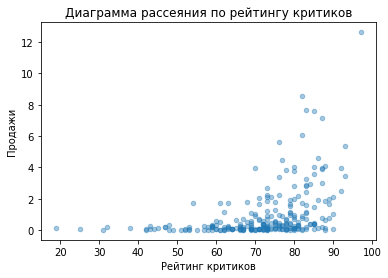

In [29]:
critic_corr = data_ps4['critic_score'].corr(data_ps4['total_sales']);
print(f'Корреляция между столбцами critic_corr и total_sales равна {critic_corr}')
critic_plot = data_ps4.plot(x='critic_score', y='total_sales', kind='scatter',
                          alpha=0.4, title='Диаграмма рассеяния по рейтингу критиков', 
                          xlabel='Рейтинг критиков', ylabel='Продажи')

 
**Лада:** ✔️ Связь между оценками пользователей и количеством продаж слабая: игры имеют разный рейтинг пользователей, однако количество продаж большинства из них невелико. Наблюдаются отдельные значения наиболее успешных игр (высокий рейтинг и много продаж)
    
Связь между оценка критиков и количеством продаж умеренная: при разнящихся рейтингах количество продаж так же невелико, наблюдаются отдельные значения наиболее успешных игр. Более сильную корреляцию рейтинга критиков можно объяснить меньшей предвзятостью оценок критиков
    
*Общий вывод:*
    
Рейтинг критиков оказывает большее влияние на количество продаж, чем рейтинг пользователей, однако влияние обоих составляющих неделико. Большое количество продаж наблюдается только у игр с высоким рейтингом по обоим показателям

#### Общее влияние оценок пользователей и критиков на общее количество продаж

Корреляция между столбцами critic_corr и total_sales равна 0.3136995151027371


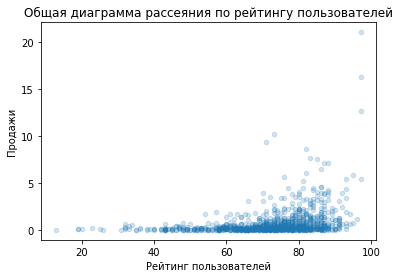

In [30]:
total_critic = good_data.plot(x='critic_score', y='total_sales', kind='scatter',
                        alpha=0.2, title='Общая диаграмма рассеяния по рейтингу пользователей', 
                          xlabel='Рейтинг пользователей', ylabel='Продажи');
critic_corr = good_data['critic_score'].corr(data['total_sales']);
print(f'Корреляция между столбцами critic_corr и total_sales равна {critic_corr}')

Корреляция между столбцами user_corr и total_sales равна -0.002607813354598273


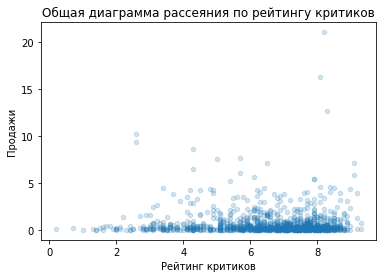

In [31]:
total_users = good_data.plot(x='user_score', y='total_sales', kind='scatter',
                             alpha=0.2, title='Общая диаграмма рассеяния по рейтингу критиков', 
                          xlabel='Рейтинг критиков', ylabel='Продажи')
user_corr = good_data['user_score'].astype('float').corr(good_data['total_sales'])
print(f'Корреляция между столбцами user_corr и total_sales равна {user_corr}')


**Лада:** ✔️ Картина распределения оценок пользователей и критиков и количества продаж по отрасли схожа с картиной распределения крупной платформы: в целом оценки не оказывают значимого влияния на продажи игр, много продаж у игр сс высоким рейтингом (существуют и исключения)

#### Распределение игр по жанрам

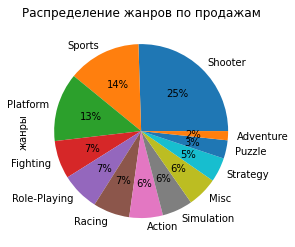

In [32]:
good_data.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='pie',
                    title='Распределение жанров по продажам', ylabel='жанры', autopct='%1.0f%%');


**Лада (2):** ✔️ Наиболее популярным является жанр Shooter, наименее популярным - Adventure

 
**Лада:** ✔️ *Промежуточный вывод*

- До 1995 года производилось незначительное количество игр, до 2008 года наблюдается постоянный уверенный рост игровой индустрии с пиком продаж в 2008-2009 годах, после наблюдается значительный спад с сохранением относительной стабильности с 2011 по 2016 год

- Потенциально прибыльными являются платформы PS4 и XOne

- Распределение продаж потенциально платформ идентично: нормальные значения находятся в диапазоне 1.75 млн продаж, чаще всего - в районе 0.25 млн, присутствуют выбросы на графиках обеих платформ. Присутствуют выбросы, показывающие наиболее прибыльные игры платформ

- Рейтинг критиков оказывает большее влияние на количество продаж, чем рейтинг пользователей, однако влияние обоих составляющих неделико. Большое количество продаж наблюдается только у игр с высоким рейтингом по обоим показателям

- Наиболее популярным является жанр Shooter, наименее популярным - Adventure

### Составление портрета пользователя

#### NA — продажи в Северной Америке

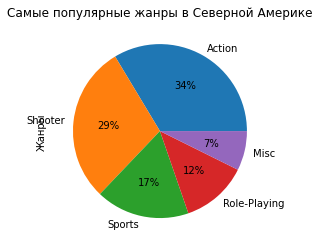

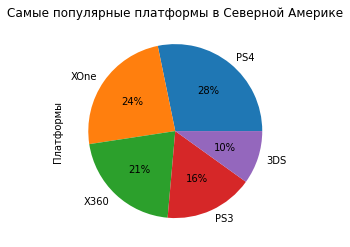

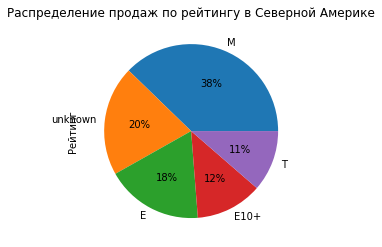

In [33]:
top_genre_na = good_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_na = good_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
rating_na = good_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genre_na.plot(kind='pie', title='Самые популярные жанры в Северной Америке', ylabel='Жанры', autopct='%1.0f%%');
plt.show()
top_platforms_na.plot(kind='pie', title='Самые популярные платформы в Северной Америке', ylabel='Платформы', autopct='%1.0f%%');
plt.show()
rating_na.plot(kind='pie', title='Распределение продаж по рейтингу в Северной Америке', ylabel='Рейтинг', autopct='%1.0f%%');

#### EU — продажи в Европе

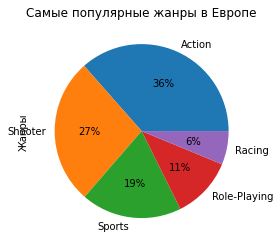

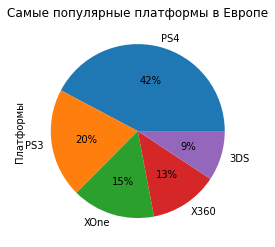

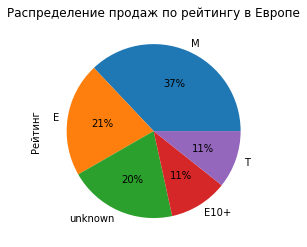

In [34]:
top_genre_eu = good_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = good_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
rating_eu = good_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genre_eu.plot(kind='pie', title='Самые популярные жанры в Европе', ylabel='Жанры', autopct='%1.0f%%');
plt.show()
top_platforms_eu.plot(kind='pie', title='Самые популярные платформы в Европе', ylabel='Платформы', autopct='%1.0f%%');
plt.show()
rating_eu.plot(kind='pie', title='Распределение продаж по рейтингу в Европе', ylabel='Рейтинг', autopct='%1.0f%%');

#### JP  — продажи в Японии

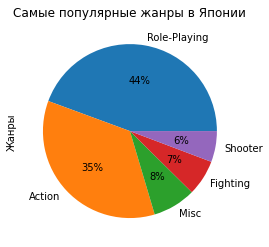

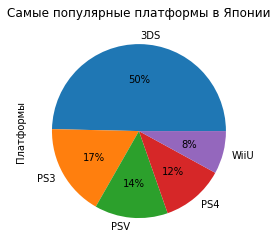

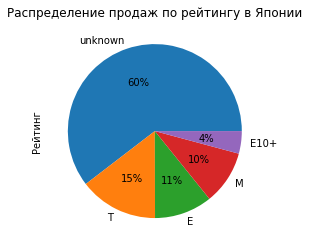

In [35]:
top_genre_jp = good_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = good_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
rating_jp = good_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)
top_genre_jp.plot(kind='pie', title='Самые популярные жанры в Японии', ylabel='Жанры', autopct='%1.0f%%');
plt.show()
top_platforms_jp.plot(kind='pie', title='Самые популярные платформы в Японии', ylabel='Платформы', autopct='%1.0f%%');
plt.show()
rating_jp.plot(kind='pie', title='Распределение продаж по рейтингу в Японии', ylabel='Рейтинг', autopct='%1.0f%%');


**Лада (2):** ✔️ *Промежуточный вывод*

Картина распределения жанров в Северной Америке и Европе схожа: первые четыре места занимают жанры Action, Shooter, Sports и Role-Playing. Пятое место занимает жанр Music в Северной Америке и Racing в Европе. В Японии распределение иное: Role-Playing, Action, Music, Fighting и Shooter. Различие в распределении предпочтений между Северной Америкой и Европой и Японией можно объяснить социальной изолированностью Японии.

Распределение платформ неоднородно во всех трёх рассматриваемых зонах: PS4, XOne, X360, PS3, 3DS для Северной Америки, PS4, PS3, XOne, X360, 3DS для Европы и 3DS, PS3, PSV, PS4, WiiU для Японии. Различия можно объяснить неоднородной рекламной и ценовой политикой компаний для разных стран

В Европе и Северной Америке наибольшей популярностью пользуется жанр игр M, следуюшими по популярности являются жанры unknown, E, E10+ для Северной Америки и M, E, unknown, E10+, T для Европы. В Японии не действует стандартная шкала рейтинга, поэтому большинство игр им не обозначены. Для особзаченный игр (менее 40%) наиболее популярными являютя игры с рейтингом T, следующими по популярности являются игры с рейтингом E, M и E10+

### Проверка гипотез

#### Гипотеза 1

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные

In [36]:
alpha = 0.05
xbox = good_data.query('platform == "XOne"').dropna()
pc = good_data.query('platform == "PC"').dropna()
results = stt.ttest_ind(xbox['user_score'], pc['user_score'], alternative='two-sided')
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.17306926618147322
Нет оснований отвергнуть нулевую гипотезу



**Лада (2):** ✔️ Вывод из гипотезы верен


**Лада (2):** ✔️ Проверю выводы из гипотез

In [37]:
xbox_mean = xbox['user_score'].mean()
pc_mean = pc['user_score'].mean()
print(f'Средний пользовательский рейтинг платформы Xbox {xbox_mean}')
print(f'Средний пользовательский рейтинг платформы PC {pc_mean}')

Средний пользовательский рейтинг платформы Xbox 6.538181818181818
Средний пользовательский рейтинг платформы PC 6.3020270270270276



**Лада (2):** ✔️ Есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### Гипотеза 2

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

In [38]:
alpha = 0.05
xbox = good_data.query('genre == "Action"').dropna()
pc = good_data.query('genre == "Sports"').dropna()
results = stt.ttest_ind(xbox['user_score'], pc['user_score'], alternative='two-sided')
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.684099430689953e-16
Отвергаем нулевую гипотезу



**Лада:** ✔️ Есть основания полагать, что средние пользовательские рейтинги жанров Action и Sports разные

In [39]:
xbox_mean = xbox['user_score'].mean()
pc_mean = pc['user_score'].mean()
print(f'Средний пользовательский рейтинг платформы Xbox {xbox_mean}')
print(f'Средний пользовательский рейтинг платформы PC {pc_mean}')

Средний пользовательский рейтинг платформы Xbox 6.9362459546925574
Средний пользовательский рейтинг платформы PC 5.665454545454545



**Лада:** ✔️ *Промежуточный вывод*

Есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные

### Вывод

**Лада:** ✔️ 

**Предобработка данных**

Названия столбцов приведены к единому стилю, типы данных приведены к необходимым, пропуски заполнены медианными значениями

**Исследовательский анализ данных**

- До 1995 года производилось незначительное количество игр, до 2008 года наблюдается постоянный уверенный рост игровой индустрии с пиком продаж в 2008-2009 годах, после наблюдается значительный спад с сохранением относительной стабильности с 2011 по 2016 год

- Потенциально прибыльными являются платформы PS4 и XOne

- Распределение продаж потенциально платформ идентично: нормальные значения находятся в диапазоне 1.75 млн продаж, чаще всего - в районе 0.25 млн, присутствуют выбросы на графиках обеих платформ. Присутствуют выбросы, показывающие наиболее прибыльные игры платформ

- Рейтинг критиков оказывает большее влияние на количество продаж, чем рейтинг пользователей, однако влияние обоих составляющих неделико. Большое количество продаж наблюдается только у игр с высоким рейтингом по обоим показателям

- Наиболее популярным является жанр Shooter, наименее популярным - Adventure

**Составление портрета пользователя**

Картина распределения жанров в Северной Америке и Европе схожа: первые четыре места занимают жанры Action, Shooter, Sports и Role-Playing. Пятое место занимает жанр Music в Северной Америке и Racing в Европе. В Японии распределение иное: Role-Playing, Action, Music, Fighting и Shooter. Различие в распределении предпочтений между Северной Америкой и Европой и Японией можно объяснить социальной изолированностью Японии.

Распределение платформ неоднородно во всех трёх рассматриваемых зонах: PS4, XOne, X360, PS3, 3DS для Северной Америки, PS4, PS3, XOne, X360, 3DS для Европы и 3DS, PS3, PSV, PS4, WiiU для Японии. Различия можно объяснить неоднородной рекламной и ценовой политикой компаний для разных стран

В Европе и Северной Америке наибольшей популярностью пользуется жанр игр M, следуюшими по популярности являются жанры unknown, E, E10+ для Северной Америки и M, E, unknown, E10+, T для Европы. В Японии не действует стандартная шкала рейтинга, поэтому большинство игр им не обозначены. Для особзаченный игр (менее 40%) наиболее популярными являютя игры с рейтингом T, следующими по популярности являются игры с рейтингом E, M и E10+

**Проверка гипотез**

Есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные